In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs # used to generate data which is not linearly separable

In [115]:
class SigmoidNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def sigmoid(self,z):
        return 1.0/(1.0 + np.exp(-z))
        
    def predict(self, X):
        y_pred = []
        for x in X:
            y_pred.append(self.sigmoid(self.perceptron(x)))
        return np.array(y_pred)
    
    def grad_w_mse(self, x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) *x
    
    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def grad_w_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred * x
        elif y == 1:
            return -1 * (1 - y_pred) * x
        
    def grad_b_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred 
        elif y == 1:
            return -1 * (1 - y_pred)
        
        
    def fit(self,X,Y, epochs = 1, alpha = 1, initialise = True, loss_fn = 'mse', display_loss = False):
        
        if initialise:
            self.w = np.random.randn(1,X.shape[1])
            self.b = 0
            loss = {}
        for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epochs'):
            dw = 0
            db = 0
            for x, y in zip(X,Y):
                if loss_fn == 'mse':
                    dw += self.grad_w_mse(x, y)
                    db += self.grad_b_mse(x, y)

                if loss_fn == 'ce':
                    dw += self.grad_w_ce(x,y)
                    db += self.grad_w_ce(x,y)
            m = X.shape[1]
            self.w -= alpha * dw/m
            self.b -= alpha * db/m

            if display_loss:
                y_pred = self.sigmoid(self.perceptron(X))
                if loss_fn == 'mse':
                    loss[i] = mean_squared_error(Y, y_pred)
                elif loss_fn == 'ce':
                    loss[i] = log_loss(Y , y_pred)   
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epoches')
            if loss_fn == 'mse':
                plt.ylabel('Mean Squared Error')
            elif loss_fn == 'ce':
                plt.ylabel('Log loss')
            plt.show()
            
        

In [116]:
# color map
# red for smaller number zero and so on
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red', 'yellow', 'green'])

In [117]:
# Generate data
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


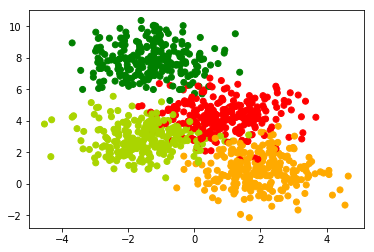

In [118]:
plt.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap )

In [119]:
labels = np.mod(labels, 2)

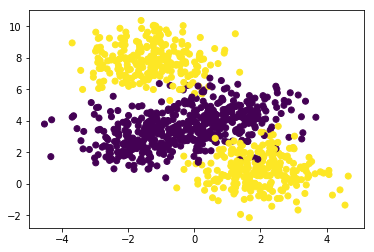

In [120]:
plt.scatter(data[:,0], data[:,1], c= labels)

In [121]:
#stratify gives equal distribution of points in train and test 
X_train, X_val, Y_train, y_val = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


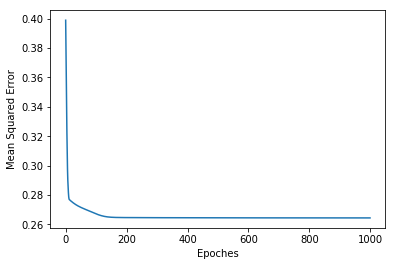

In [124]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train,epochs = 1000,alpha = 0.1, display_loss = True)

In [148]:
y_pred_train = sn.predict(X_train)
y_pred_binarised_train = (y_pred_train >= 0.5).astype('int').ravel()
y_pred_val = sn.predict(X_val)
y_pred_binarised_test = (y_pred_val >= 0.5).astype('int').ravel()

accuracy_train = accuracy_score(y_pred_binarised_train, Y_train)
accuracy_test = accuracy_score(y_pred_binarised_test, y_val)

print('Training accuracy: ', round(accuracy_train, 2))
print('Testing Accuracy: ', round(accuracy_test,2))

Training accuracy:  0.73
Testing Accuracy:  0.72


In [149]:
accuracy_train

0.7346666666666667

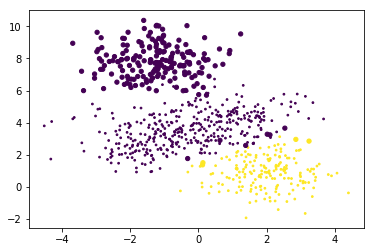

In [152]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_pred_binarised_train, s = 15 *(np.abs(y_pred_binarised_train - Y_train) + 0.2))